In [1]:
import QuckDrawGAN as qd

In [ ]:
qd.train(
    epochs=3, # рекомендовано 100 эпох
    batch_size=64,
    data_path='duck.ndjson',
    output_path = 'output',
    lr_g = 0.001,
    lr_d = 0.002,
    data_max_size = 30000,
)

In [ ]:
qd.discriminator_fine_tune(generator_file = 'output/models/generator.pt', 
                           discriminator_file = 'output/models/discriminator.pt', 
                           data_path = 'duck.ndjson', 
                           batch_size=64, 
                           fine_tune_epochs=3, # рекомендовано 15 эпох
                           lr_d=0.005, 
                           data_max_size=None)

In [2]:
import zipfile
import os

with zipfile.ZipFile('pretrained_output.zip', 'r') as zip_ref:
    zip_ref.extractall('pretrained_output')

In [2]:
generator_file = r'pretrained_output/models/generator.pt'  # Замените на ваш путь к файлу генератора
discriminator_file = r'pretrained_output/models/discriminator_fine_tuned.pt'  # Замените на ваш путь к файлу дискриминатора, если он есть

# Создаем объект модели
model = qd.Model(generator_file, discriminator_file)

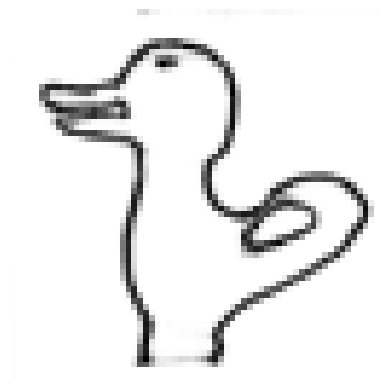

In [32]:
import matplotlib.pyplot as plt

# Генерация изображения
best_image = model.generate(16)  # Генерируем одно изображение

# Отображение изображения
plt.imshow(best_image, cmap='gray')  # Передаем только изображение
plt.axis('off')  # Скрываем оси
plt.show()